Instructions for students:

Since this notebook is shared, any changes you make will not be saved unless you create your own copy of this notebook in your google drive. To do this, click on 'File' and click 'Save a copy in Drive'. A new tab will open that will point to your own local copy of this notebook. You can now make changes and your modifications would be saved in your own google drive.

Run each cell in this notebook, one by one, reading the comment above the cell first. This will aid in understanding what the code is doing.

After running all cells, try changing the network architecture. Try adding more layers or changing the number of units in the layer. Can you achieve a higher accuracy?

# Binary Classification in Tensorflow

## Classifying movie reviews: A binary classification example

We will train a neural network to classify movie reviews as either a positive review or a negative review.

### The IMDB dataset

**Loading the IMDB dataset**

The IMDB dataset containes 50000 reviews from the Internet Movie Database (imdb.com). By default, the data is split into 25000 reviews for training and 25000 reviews for testing and each split-set is balanced, containing 50% negative reviews and 50% positive reviews.

This dataset is packaged with Keras and has already been pre-processed for you, i.e., the words have already been converted into sequences of integers as we will show below.

We specifiy num_words = 10000, this means that we only want to keep the top 10000 most frequently occurring words in the training data and rare words would be discarded. The reason for this is so we have a fixed vector of 10000 going into our neural network later on, and also to keep things at a maneagable size.

In [2]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

17464789/17464789 [==============================] - 1s 0us/step


Lets inspect the data.

Executing the cell below, we see that the total number of records in the training dataset is 25000 rows.

We can also see that the first movie review at index 0 is a sentence containing 218 words.

The actual data in the first record (at index 0) contains a sentence where each word has been converted to an integer. This integer corresponds to a word in a word-dictionary.

In [3]:
print(len(train_data))
print(len(train_data[0]))
print(train_data[0])

25000
218
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


Lets inspect the labels.
We see that the corresponding label for the review we viewed above has a value of 1. Since this is a binary classification problem, 1 represents a positive review and 0 represents a negative review.

In [4]:
train_labels[0]

1

The cell below shows that the length of the review with the most words is 9999.

In [5]:
max([max(sequence) for sequence in train_data])

9999

**Decoding reviews back to text**

Convert the word indices of the review at index 0 of the training dataset back to a string sentence. Now we can read the review. We will replace missing words with a question mark. Remember we only kept the most frequently used words and discarded the rest.

In [6]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])
decoded_review

1641221/1641221 [==============================] - 0s 0us/step


"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

### Preparing the data

**Encoding the integer sequences via multi-hot encoding**

You cannot pass the training data just yet to the neural network. Each review has different lengths. Lets turn them into a vector of zeros and ones and convert the sequence into a 10000-dimensional vector.

For example, if a sequence/review contained the words 'Very good' and its integer sequence in our training dataset was [10, 15] (10=very and 15=good). When we convert this sequence to a 10000 dimensional vector, all would be 0's except for indices 10 and 15.

In [7]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

We store these in new variables x_train and x_test.
In the cell below, we see that the review at position 0 has now been multi-hot encoded. Compare this with the same review in the old variable train_data[0] from above.

In [8]:
print(x_train[0])

[0. 1. 1. ... 0. 0. 0.]


x_train refers to our training data, y_train contains the labels for it.
Similarly, x_test refers to our testing data and y_test containes the labels for it.

In [9]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [10]:
y_train[0]

1.0

### Building your model

**Model definition**

Our input data are vectors with fixed 10000 dimensional inputs for all reviews and our labels are scalars (1's and 0's). We will use a stack of Densely connected layers for this problem with ReLU activation functions.

**Dense Layers**

Dense layers, also known as fully connected layers, are a fundamental component of artificial neural networks (ANNs). In a dense layer, each neuron or node in the layer is connected to every neuron in the preceding layer. This means that each neuron receives input from all the neurons in the previous layer and computes its output using a weighted sum of those inputs, followed by an activation function.

Here's a breakdown of how a dense layer operates:

    Input: Each neuron in the dense layer receives input from all the neurons in the preceding layer. If the preceding layer has n neurons, then each neuron in the dense layer receives n inputs.

    Weights: Each input to a neuron is associated with a weight. These weights determine the strength of the connection between the neurons. The weights are learned during the training process through techniques like gradient descent.

    Weighted Sum: The inputs are multiplied by their corresponding weights, and the results are summed up. This computation can be represented mathematically as:
    weighted_sum=∑i=1ninputi×weightiweighted_sum=∑i=1n​inputi​×weighti​

    Bias: A bias term is often added to the weighted sum before applying the activation function. The bias term allows the model to capture shifts in the data that are independent of the input features.

    Activation Function: The weighted sum (optionally plus bias) is passed through an activation function, which introduces non-linearity to the output of the neuron. Common activation functions include sigmoid, tanh, ReLU (Rectified Linear Unit), and softmax.

The output of a dense layer is typically a vector, with each element representing the output of one neuron in the layer. Dense layers are versatile and can be used in various neural network architectures, including feedforward neural networks (where layers are arranged sequentially), convolutional neural networks (CNNs), and recurrent neural networks (RNNs). They are often used in the final layers of a network for tasks such as classification or regression.

**ReLU**

ReLU (Rectified Linear Unit) is an activation function commonly used in artificial neural networks. It introduces non-linearity to the output of neurons, allowing neural networks to learn complex patterns and relationships in data. The ReLU function is defined as:

f(x)=max⁡(0,x)f(x)=max(0,x)

In other words, the output of the ReLU function is the maximum of 0 and the input xx. Visually, this function looks like a ramp, where any negative input is flattened to 0, while positive inputs remain unchanged.

Here are some key characteristics of the ReLU activation function:

    Simplicity: ReLU is simple and computationally efficient. It avoids the computational cost associated with more complex activation functions like sigmoid or tanh.

    Sparsity: ReLU introduces sparsity in the network because any negative input is mapped to 0. This sparsity can be beneficial for regularization, as it helps prevent overfitting by reducing the co-adaptation of neurons.

    Non-linearity: Although ReLU is a linear function for positive inputs, it introduces non-linearity overall. This non-linearity is crucial for enabling neural networks to approximate complex functions.

    Vanishing Gradient: ReLU helps alleviate the vanishing gradient problem, which can occur with activation functions like sigmoid and tanh. The gradient of ReLU is 1 for positive inputs, which prevents the gradients from becoming too small during backpropagation.

**Sigmoid Activation Function**

The sigmoid activation function, also known as the logistic function, is commonly used in binary classification problems. It squashes the input values between 0 and 1, which makes it suitable for binary classification tasks where the output needs to represent probabilities.

Here are some key properties of the sigmoid function:

    Output Range: The output of the sigmoid function is always between 0 and 1. This property makes it convenient for binary classification tasks, where the output can be interpreted as the probability of belonging to the positive class.

    Smoothness: The sigmoid function is smooth and continuously differentiable, which makes it suitable for gradient-based optimization algorithms like gradient descent.

    Non-linear Transformation: The sigmoid function introduces non-linearity to the network, allowing it to model complex relationships between the input features and the target variable.

In binary classification tasks, the sigmoid function is typically used as the activation function in the output layer of a neural network. The output of the sigmoid function can be interpreted as the probability that a given input belongs to the positive class. For example, if the output of the sigmoid function is 0.7, it means that the model estimates a 70% probability that the input belongs to the positive class.

In [30]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
import numpy as np

tf.random.set_seed(1234)
np.random.seed(1234)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

**Compiling the model**

In this step, we set the optimizer used for back propagation and the objective function(also called Loss function or Cost Function) of the network.
We also want tensorflow to monitor the accuracy of the network for us during training.

In [31]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

The validation set is used to evaluate the performance of the model during training on data that it hasn't seen before. By monitoring the model's performance on the validation set, you can make decisions about hyperparameters, such as the learning rate, batch size, and architecture, to improve the model's generalization ability without overfitting to the training data.

Preventing Overfitting: Overfitting occurs when a model learns to perform well on the training data but fails to generalize to unseen data. By evaluating the model's performance on a separate validation set, you can detect when the model starts to overfit and take corrective actions, such as early stopping or regularization techniques.

Hyperparameter Tuning: The validation set is often used in conjunction with techniques like grid search or random search to search for the optimal hyperparameters of the model. By training and evaluating the model with different hyperparameter configurations on the validation set, you can identify the settings that result in the best performance.

Monitoring Training Progress: Monitoring the model's performance on the validation set allows you to track the training progress and detect issues such as learning stagnation or divergence early on. This information can be used to adjust the training process or troubleshoot potential problems.

Overall, the validation set plays a crucial role in training neural networks effectively by providing an unbiased estimate of the model's performance and guiding decisions related to model selection, hyperparameter tuning, and training monitoring.


In [13]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [14]:
len(x_val)

10000

**Training your model**

In neural network training, an epoch refers to one complete pass through the entire training dataset. During each epoch, the neural network is trained on all the training samples, typically in batches, with the goal of updating the model's parameters (weights and biases) to minimize the loss function.

Here's how the training process typically works across epochs:

    Initialization: At the start of training, the model parameters are initialized randomly or using pre-trained weights (in the case of transfer learning).

    Epoch Loop: During each epoch, the training dataset is divided into batches, and the model is trained on each batch sequentially. The order in which the batches are presented to the model can vary between epochs, depending on the shuffling of the dataset.

    Batch Training: For each batch, the model receives input data and corresponding labels. It performs forward propagation to compute the predicted outputs, then calculates the loss between the predicted outputs and the true labels. Afterward, it performs backward propagation (backpropagation) to compute the gradients of the loss function with respect to the model parameters.

    Parameter Update: Using the computed gradients, the optimizer updates the model parameters (weights and biases) in the direction that reduces the loss function. The optimizer may employ techniques like stochastic gradient descent (SGD), Adam, RMSprop, or others to perform this parameter update.

    Validation: After completing one pass through the entire training dataset (one epoch), the model's performance is typically evaluated on a separate validation dataset. This helps monitor the model's generalization ability and detect overfitting.

    Repeat: The training process continues for a predefined number of epochs or until a stopping criterion is met (e.g., convergence or early stopping based on the validation performance).

Training a neural network typically involves multiple epochs to allow the model to learn from the training data iteratively and refine its parameters over time. The number of epochs is a hyperparameter that needs to be carefully chosen, balancing the risk of overfitting (too many epochs) with the risk of underfitting (too few epochs).

In [15]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 72ms/step - loss: 0.5238 - accuracy: 0.7825 - val_loss: 0.4096 - val_accuracy: 0.8488
Epoch 2/20
30/30 [==============================] - 1s 33ms/step - loss: 0.3223 - accuracy: 0.8969 - val_loss: 0.3239 - val_accuracy: 0.8767
Epoch 3/20
30/30 [==============================] - 1s 35ms/step - loss: 0.2433 - accuracy: 0.9201 - val_loss: 0.2916 - val_accuracy: 0.8844
Epoch 4/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1968 - accuracy: 0.9381 - val_loss: 0.2760 - val_accuracy: 0.8877
Epoch 5/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1662 - accuracy: 0.9458 - val_loss: 0.2776 - val_accuracy: 0.8859
Epoch 6/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1400 - accuracy: 0.9564 - val_loss: 0.2843 - val_accuracy: 0.8856
Epoch 7/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1219 - accuracy: 0.9613 - val_loss: 0.2937 - val_accuracy: 0.8850
Epoch 8/20
30

The history object contains the history of the losses and metrics(accuracy) during training. This information is extremely important so we can examine how the model progressed during training and we can determine whether the model was overfitting etc.

In [16]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

**Plotting the training and validation loss**

As you can see below, the training loss decreases with every epoch as expected and the accuracy increases with every epoch. But this isn't the case for the validation loss. The validation loss seems to reach the lowest point at around 4 epochs (observing the graph below). This shows an example of how the model performs better on training data and doesn't always generalise to data it hasn't seen before. Here, the model starts overfitting around the fourth epoch. This means that you are overoptimising on the training data and the neural network is learning representations that are specific to the training data which does not generalise well of unseen data. In this case you could stop training after 4 epochs, or you could use techiques like Early Stopping to automatically stop training.

Overfitting and underfitting are common problems encountered in machine learning, including neural network training:

    Overfitting:
        Overfitting occurs when a model learns to perform exceptionally well on the training data but fails to generalize to new, unseen data. In other words, the model captures noise and patterns specific to the training data, rather than the underlying relationship between features and the target variable.
        Signs of overfitting include high accuracy on the training data but poor performance on validation or test data.
        Causes of overfitting can include overly complex models, insufficient regularization, noisy data, or a lack of diverse training data.
        Techniques to combat overfitting include:
            Simplifying the model architecture (e.g., reducing the number of parameters, using simpler model types).
            Adding regularization techniques such as L1 or L2 regularization, dropout, or early stopping.
            Increasing the amount of training data or improving its quality.
            Using techniques like cross-validation to evaluate model performance more robustly.

    Underfitting:
        Underfitting occurs when a model is too simple to capture the underlying structure of the data. The model performs poorly not only on the training data but also on new data because it fails to capture the relationships between features and the target variable.
        Signs of underfitting include poor performance on both training and validation or test data.
        Causes of underfitting can include using a model that is too simple, not training the model for a sufficient number of epochs, or insufficient feature engineering.
        Techniques to address underfitting include:
            Increasing the complexity of the model by adding more layers, neurons, or parameters.
            Training the model for more epochs or using more sophisticated optimization techniques.
            Improving feature engineering to provide the model with more relevant information.

In summary, overfitting occurs when a model learns the noise in the training data, while underfitting occurs when a model fails to capture the underlying patterns in the data. Both problems can lead to poor generalization performance and should be addressed during model development and training. Regularization techniques and model evaluation on separate validation or test datasets are essential tools for managing overfitting and underfitting.

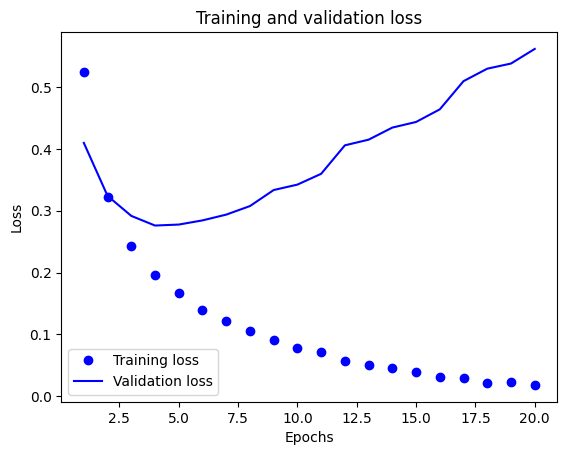

In [17]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

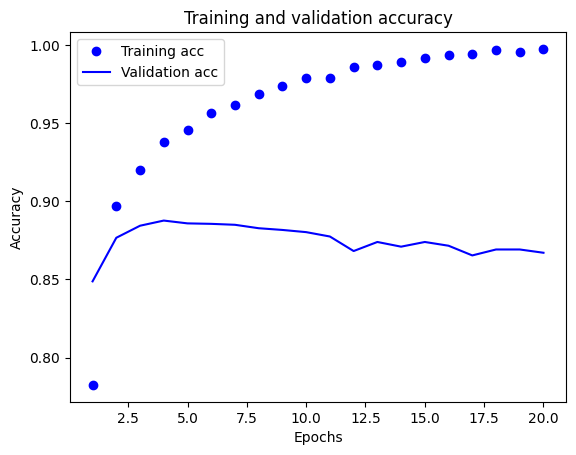

In [18]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

Lets set this to 4 epochs training and adjust the network architecture to include more units (16 to 64 on the first layer and 16 to 32 on the second layer).

We perform a final evaluation of our results on our testing dataset which we kept aside.

In [19]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 3s 45ms/step - loss: 0.4513 - accuracy: 0.8040
Epoch 2/4
49/49 [==============================] - 2s 46ms/step - loss: 0.2671 - accuracy: 0.8979
Epoch 3/4
49/49 [==============================] - 2s 45ms/step - loss: 0.2134 - accuracy: 0.9198
Epoch 4/4
782/782 [==============================] - 3s 4ms/step - loss: 0.3062 - accuracy: 0.8788


The results:
The first number is the test loss and the second number is the test accuracy.
With state of the art neural network models, it is possible to achieve an accuracy of 95%.

In [20]:
results

[0.30622398853302, 0.8787999749183655]

### Using a trained model to generate predictions on new data

Lets view the raw outputs of our neural network. We observe the probability values. Note, the final layer of our neural network had a Sigmoid activation function.

Lets inspect the first 10 predictions.
As we can see for the first review, the model predicted a probability of 0.15 which means that the model is confident that this review is negative and the corresponding ground truth label is 0 (see the next cell). In other words, the model is 15% confident that the review is positive i.e. the model is actually not confident that it is a postive review and more confident that it is a negative review.

On the other hand, the model is quite confident that the second movie review is positive as the predicted probability is 99.9%. We see that the ground truth label is 1.

However, sometimes the model does get it wrong. Find a prediction in the list below where the model is wrong.

In [21]:
predictions = model.predict(x_test)

782/782 [==============================] - 4s 5ms/step


In [22]:
predictions[0:10]

array([[0.12591879],
       [0.99923974],
       [0.69277805],
       [0.7373457 ],
       [0.94939667],
       [0.7473953 ],
       [0.9975977 ],
       [0.00362493],
       [0.959738  ],
       [0.9925126 ]], dtype=float32)

In [23]:
y_test[0:10]

array([0., 1., 1., 0., 1., 1., 1., 0., 0., 1.], dtype=float32)

Lets convert the first movie review of our test set back to words so we can read it ourselves and assess whether it seems like a positive review or not. The model predicted that this was a negative review and the ground truth label also shows that it is negative.

In [32]:
data = test_data
review_index_to_convert = 0

word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in data[review_index_to_convert]])
decoded_review

"? please give this one a miss br br ? ? and the rest of the cast rendered terrible performances the show is flat flat flat br br i don't know how michael madison could have allowed this one on his plate he almost seemed to know this wasn't going to work out and his performance was quite ? so all you madison fans give this a miss"

### Confusion Matrix

A confusion matrix is a table that is often used to describe the performance of a classification model on a set of test data for which the true values are known. It allows visualization of the performance of an algorithm.

In a binary classification problem, the confusion matrix has four important terms:

    True Positive (TP): These are the cases in which the model correctly predicted the positive class.

    True Negative (TN): These are the cases in which the model correctly predicted the negative class.

    False Positive (FP): These are the cases in which the model incorrectly predicted the positive class when it is actually negative.

    False Negative (FN): These are the cases in which the model incorrectly predicted the negative class when it is actually positive.



In [25]:
confusion = tf.math.confusion_matrix(labels=y_test, predictions=predictions, num_classes=2)

In [26]:
print(confusion)

tf.Tensor(
[[12500     0]
 [12500     0]], shape=(2, 2), dtype=int32)


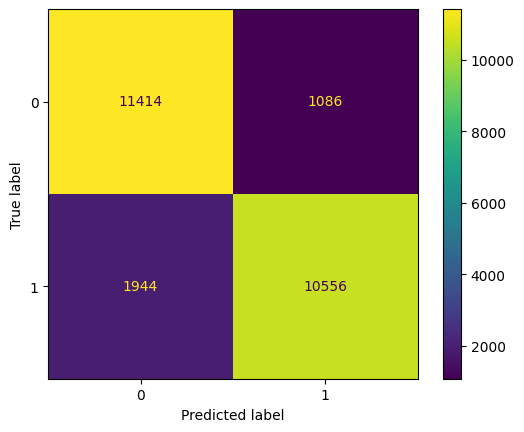

In [27]:
import matplotlib.pyplot as plt
from sklearn import metrics

actual = y_test
predicted = np.array(predictions)
predicted = (predicted>0.5).astype(int)

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
plt.show()

In [28]:
TP = cm_display.confusion_matrix[0][0]
FP = cm_display.confusion_matrix[0][1]
FN = cm_display.confusion_matrix[1][0]
TN = cm_display.confusion_matrix[1][1]
print(TP, FP, TN, FN)

11414 1086 10556 1944


In [29]:
accuracy = (TP+TN)/(TP+TN+FP+FN)
print(accuracy)

0.8788


We computed the accuracy manually. This is the same value as the accuracy reported by tensorflow when we called results = model.evaluate(x_test, y_test). Scroll above to confirm.